### Try It: Comparing Feature Selection Methods

In this module, you have seen two ways to select features.  The first approach is using sequential feature selection to sequentially add or delete features and only use those that improve the model.  The second approach is using a regularized model to identify features based on non-zero coefficients.  This activity focuses on comparing variations of both these methods.  

You will use both the `SequentialFeatureSelection` and `RFE` (recursive feature elimination) to build and compare regression models.  Consider the following 6 feature selection methods -- leave all other arguments to default besides the `estimator` and `n_features_to_select` arguments:

- `Ridge` regressor to extract coefficients
- `SequentialFeatureSelection` using the `Lasso` to select 4 features.
- `RFE` using `Lasso` to select 4 features.

For each of these, fit the training data `X_train`, `y_train` below.  Compare the magnitude of the results of your `Ridge` model to those that result from feature selection methods.  

#### The Data

For this problem a dataset with information on red wine chemical compositions and their quality is given.  Your goal is to use the properties of the wine to predict the quality.  Below, the data is loaded and train/test splits constructed.

In [51]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [52]:
df = pd.read_csv('data/winequality-red.csv', sep = ',')

In [53]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [54]:
X = df.drop('quality', axis = 1)
y = df['quality']

<Axes: >

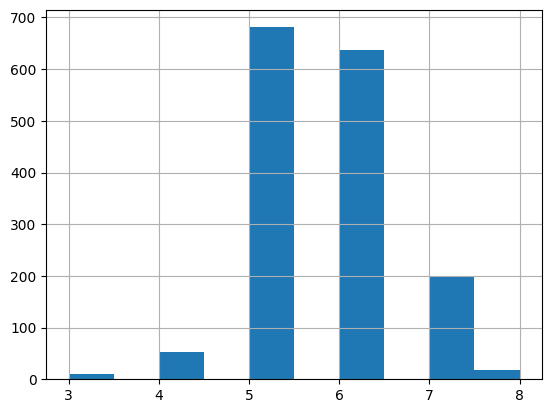

In [55]:
y.hist()

In [56]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:
# Apply Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_coefs = ridge.coef_


In [58]:
# Apply Sequential Feature Selection with Lasso
lasso = Lasso()
sfs = SequentialFeatureSelector(lasso, n_features_to_select=4)
sfs.fit(X_train, y_train)
sfs_features = X_train.columns[sfs.get_support()]

In [59]:
# Apply Recursive Feature Elimination with Lasso
rfe = RFE(lasso, n_features_to_select=4)
rfe.fit(X_train, y_train)
rfe_features = X_train.columns[rfe.get_support()]

In [69]:
# Print the results
print("Ridge Coefficients:")
print(list(zip(X_train.columns, ridge_coefs)))

print("\nSequential Feature Selection (Lasso) Features:")
print(list(zip(X_train.columns, sfs_features)))

print("\nRecursive Feature Elimination (RFE with Lasso) Features:")
print(list(zip(X_train.columns, rfe_features)))

Ridge Coefficients:
[('fixed acidity', 0.019613764471154524), ('volatile acidity', -1.0215292855964897), ('citric acid', -0.16427026130989658), ('residual sugar', 0.0006236795445728349), ('chlorides', -1.2267737502612504), ('free sulfur dioxide', 0.005685887482222565), ('total sulfur dioxide', -0.0035605303701549047), ('density', -0.01115260055782487), ('pH', -0.37622267335186943), ('sulphates', 0.7469557657610918), ('alcohol', 0.2975910670011518)]

Sequential Feature Selection (Lasso) Features:
[('fixed acidity', 'fixed acidity'), ('volatile acidity', 'volatile acidity'), ('citric acid', 'citric acid'), ('residual sugar', 'total sulfur dioxide')]

Recursive Feature Elimination (RFE with Lasso) Features:
[('fixed acidity', 'total sulfur dioxide'), ('volatile acidity', 'pH'), ('citric acid', 'sulphates'), ('residual sugar', 'alcohol')]


In [61]:
# Fit and predict using the selected features
# Sequential Feature Selection
X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)
lasso_sfs = Lasso()
lasso_sfs.fit(X_train_sfs, y_train)
sfs_preds = lasso_sfs.predict(X_test_sfs)


In [62]:
# Recursive Feature Elimination
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)
lasso_rfe = Lasso()
lasso_rfe.fit(X_train_rfe, y_train)
rfe_preds = lasso_rfe.predict(X_test_rfe)

In [63]:
# Calculate and print the Mean Squared Error for comparison
ridge_preds = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_preds)
sfs_mse = mean_squared_error(y_test, sfs_preds)
rfe_mse = mean_squared_error(y_test, rfe_preds)

print(f"Ridge Regression MSE: {ridge_mse}")
print(f"SFS (Lasso) MSE: {sfs_mse}")
print(f"RFE (Lasso) MSE: {rfe_mse}")

Ridge Regression MSE: 0.3929488678812798
SFS (Lasso) MSE: 0.6476147191182037
RFE (Lasso) MSE: 0.6476147191182037


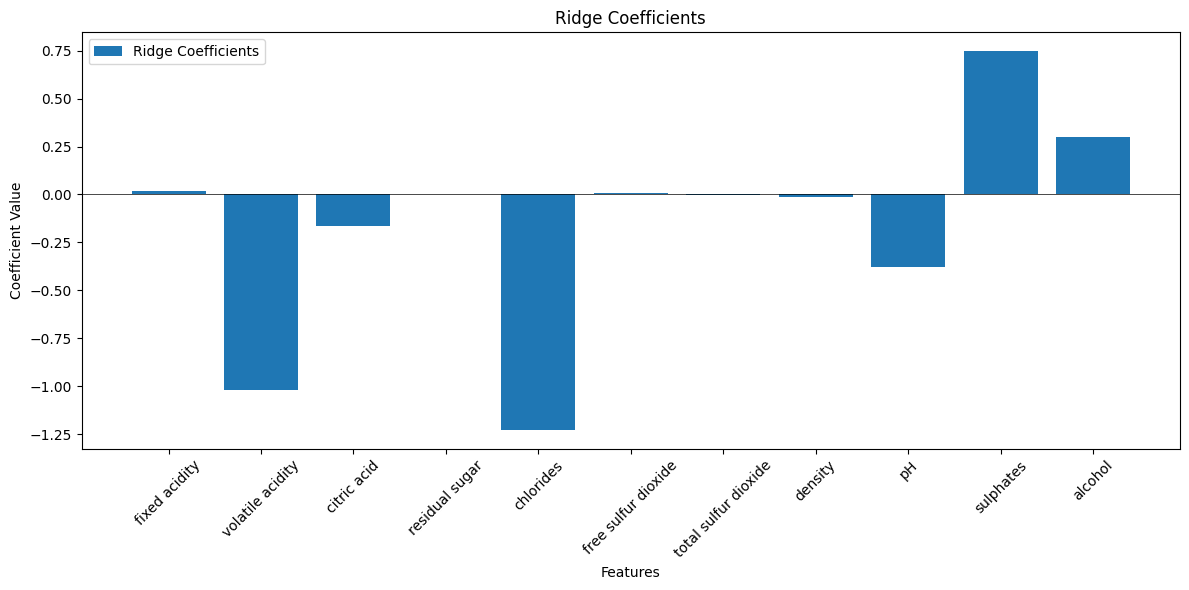

In [70]:
# Plot the coefficients of the Ridge model and the selected features
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(X.columns, ridge_coefs, label='Ridge Coefficients')
plt.axhline(0, color='black', linewidth=0.5)
plt.title("Ridge Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('ridge.png')
plt.show()

 sequential feature selection 
 regularized model

To start, build a Pipeline named auto_pipe with named steps polyfeatures, scaler and lasso model that utilize PolynomialFeatures, StandardScaler, and the Lasso estimator with the following parameters:

degree = 3 in PolynomialFeatures
include_bias = False in PolynomialFeatures
random_state = 42 in Lasso
Fit the pipeline on auto_X_train and auto_y_train data given. Extract the lasso coefficients from the pipeline and assign them as an array to lasso_coefs below.

HINT: Use the .named_steps['lasso'] to extract that lasso estimator and use the .coef_ attribute after fitting to access the model coefficients.

Define a dictionary param_dict with key selector__n_features_to_select and key [2, 3, 4, 5].
Use GridSearchCV construct a grid search over the n_features_to_select parameter of the selector_pipe  estimator dfined below. Assign your resul to selector_grid.
Use the predict function on selector_grid to compute the predictions on X_train. Assign your result to train_preds.
Use the predict function on selector_grid to compute the predictions on X_test. Assign your result to test_preds.
Use the mean_squared_error function to compute the MSE between y_train and train_preds. Assign your result to selector_train_mse.
Use the mean_squared_error function to compute the MSE between y_test and test_preds. Assign your result to selector_test_mse.

In [67]:
model_1 = ''
model_1_coefs = ''

### BEGIN SOLUTION
model_1 = Ridge().fit(X_train, y_train)
model_1_coefs = model_1.coef_
### END SOLUTION

# Answer check
print(f'Ridge Coefs: {np.round(model_1_coefs, 2)}')

print('For Ridge regwe have the following coefficients:')
list(zip(X_train.columns, model_1_coefs))

Ridge Coefs: [ 0.02 -1.02 -0.16  0.   -1.23  0.01 -0.   -0.01 -0.38  0.75  0.3 ]
For Ridge regwe have the following coefficients:


[('fixed acidity', 0.019613764471154524),
 ('volatile acidity', -1.0215292855964897),
 ('citric acid', -0.16427026130989658),
 ('residual sugar', 0.0006236795445728349),
 ('chlorides', -1.2267737502612504),
 ('free sulfur dioxide', 0.005685887482222565),
 ('total sulfur dioxide', -0.0035605303701549047),
 ('density', -0.01115260055782487),
 ('pH', -0.37622267335186943),
 ('sulphates', 0.7469557657610918),
 ('alcohol', 0.2975910670011518)]

In [48]:
param_dict = {}
selector_grid = ''
selector_train_mse = ''
selector_test_mse = ''

### BEGIN SOLUTION
param_dict = {'selector__n_features_to_select': [2, 3, 4, 5]}
selector_grid = GridSearchCV(selector_pipe, param_grid=param_dict)
selector_grid.fit(X_train, y_train)
train_preds = selector_grid.predict(X_train)
test_preds = selector_grid.predict(X_test)
selector_train_mse = mean_squared_error(y_train, train_preds)
selector_test_mse = mean_squared_error(y_test, test_preds)



model_1_best_alpha = selector_grid.best_params_
print(f'Best Alpha: {list(model_1_best_alpha.values())[0]}')



### END SOLUTION

# ANSWER CHECK
print(f'Train MSE: {selector_train_mse}')
print(f'Test MSE: {selector_test_mse}')


Best Alpha: 2
Train MSE: 0.662513451228818
Test MSE: 0.6198405938087134


In [45]:
# Lasso
# Create lasso regression object with an alpha value
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
lasso = Lasso(alpha=0.1)

# Train the model using the training sets
lasso.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_lasso = lasso.predict(X_test)

# The coefficients
print('Coefficients: \n', lasso.coef_)
print()
# The root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print('RMSE: %.2f' % rmse)
# R Squared
r2 = r2_score(y_test, y_pred_lasso)
print('R2 score: %.2f' % r2)

mse = mean_squared_error(y_test, y_pred_lasso)
print('MSE: %.2f' % mse)

print('For alpha = 0.1 we have the following coefficients:')
list(zip(X_train.columns, lasso.coef_))

Coefficients: 
 [ 0.02214667 -0.          0.          0.         -0.          0.00598117
 -0.00423658 -0.         -0.          0.          0.26112841]

RMSE: 0.70
R2 score: 0.21
MSE: 0.49
For alpha = 0.1 we have the following coefficients:


[('fixed acidity', 0.02214666700161595),
 ('volatile acidity', -0.0),
 ('citric acid', 0.0),
 ('residual sugar', 0.0),
 ('chlorides', -0.0),
 ('free sulfur dioxide', 0.005981168750013651),
 ('total sulfur dioxide', -0.004236579351880069),
 ('density', -0.0),
 ('pH', -0.0),
 ('sulphates', 0.0),
 ('alcohol', 0.2611284098842483)]

In [23]:
grid_2 = ''
model_2_train_mse = ''
model_2_test_mse = ''
model_2_best_alpha = ''

param_dict = {'ridge__alpha': [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0]}

### BEGIN SOLUTION
grid_2 = GridSearchCV(selector_pipe, param_grid=param_dict)
grid_2.fit(X_train, y_train)
train_preds = grid_2.predict(X_train)
test_preds = grid_2.predict(X_test)
model_2_train_mse = mean_squared_error(y_train, train_preds)
model_2_test_mse = mean_squared_error(y_test, test_preds)
model_2_best_alpha = grid_2.best_params_


### END SOLUTION

# Answer check
print(f'Test MSE: {model_2_test_mse}')
print(f'Best Alpha: {list(model_2_best_alpha.values())[0]}')

ValueError: Invalid parameter 'ridge' for estimator Pipeline(steps=[('selector',
                 SequentialFeatureSelector(estimator=LinearRegression())),
                ('scaler', StandardScaler()),
                ('lasso', Lasso(random_state=42))]). Valid parameters are: ['memory', 'steps', 'verbose'].